In [277]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import pandas as pd

In [278]:

data = pd.read_excel('parameters.xlsx')

V0 = data['V'].values
tp = data['t'].values
Tme = data['exp Tmax'].values
tpe = data['exp t_p'].values


In [279]:
# Time
dt = 1e-4
t = np.arange(dt,1.5+dt,dt)

# heat transfer
T0 = 730
T = np.zeros(len(t))+T0


In [280]:
def power(V0,tp):
    # Power funciton
    wv = np.zeros(len(t))
    a = 0.003
    b = tp
    c = 1e-5
    d = 1.1

    for i in range(len(t)):
        if t[i] < 0.01:
            wv[i] = c
        elif (0.01 <= t[i]) & (t[i] < (0.01+a/2)):
            wv[i] = c + 2/a**2*(t[i]-0.01)**2
        elif (0.01+a/2 <= t[i]) & (t[i] < (0.01+a)):
            wv[i] = c + -2/a**2*(t[i]-0.01-a)**2+1
        elif ((0.01+a) <= t[i]) & (t[i] < (0.01+b-a)):
            wv[i] = c + 1
        elif ((0.01+b-a) <= t[i]) & (t[i] < (0.01+b-a/2)):
            wv[i] =c + -2/a**2*(t[i]-0.01-b+a)**2+1
        elif ((0.01+b-a/2) <= t[i]) & (t[i] < (0.01+b)):
            wv[i] =c + 2/a**2*(t[i]-0.01-b)**2
        else:
            wv[i] = c

    V = V0 * wv
    return V**2/4.418081

In [281]:
def heat_balance(V0,tp):
    kh_para = [-1.17646868e+00,  8.79388590e-02, -1.76623479e-03 , 1.95641894e+02 , -1.54045840e+01,  3.05744974e-01,  7.00453986e+04, -1.48784138e+04 ,  8.64516753e+02, -1.53211496e+01 ,-1.09377228e+06 , 1.91396811e+05 , -1.03021356e+04 , 1.76215034e+02 ,3.31973626]
    ht_para = [-5.69414943e-01 , 5.55261699e-02 ,-1.16346353e-03 , 1.33873676e+02,  -1.04171549e+01 , 2.04829516e-01 , 4.35509339e+04 ,-9.63683850e+03 ,  5.66531592e+02, -1.00836520e+01, -6.95840206e+05 , 1.24325031e+05 , -6.75178551e+03  ,1.15989329e+02,-2.32434753]
    kh = kh_para[0]*V0 + kh_para[1]*(V0**2) + kh_para[2]*(V0**3) + \
         kh_para[3]*(tp**1)*(V0**1) + kh_para[4]*(tp**1)*(V0**2) + kh_para[5]*(tp**1)*(V0**3) + \
         kh_para[6]*(tp**2)*(V0**0)  + kh_para[7]*(tp**2)*(V0**1) + kh_para[8]*(tp**2)*(V0**2) + kh_para[9]*(tp**2)*(V0**3) + \
         kh_para[10]*(tp**3)*(V0**0) + kh_para[11]*(tp**3)*(V0**1) + kh_para[12]*(tp**3)*(V0**2) + kh_para[13]*(tp**3)*(V0**3) + kh_para[14]
    ht = ht_para[0]*V0 + ht_para[1]*(V0**2) + ht_para[2]*(V0**3) + \
         ht_para[3]*(tp**1)*(V0**1) + ht_para[4]*(tp**1)*(V0**2) + ht_para[5]*(tp**1)*(V0**3) + \
         ht_para[6]*(tp**2)*(V0**0)  + ht_para[7]*(tp**2)*(V0**1) + ht_para[8]*(tp**2)*(V0**2) + ht_para[9]*(tp**2)*(V0**3) + \
         ht_para[10]*(tp**3)*(V0**0) + ht_para[11]*(tp**3)*(V0**1) + ht_para[12]*(tp**3)*(V0**2) + ht_para[13]*(tp**3)*(V0**3) + ht_para[14]
    Cp = kh*0.010783 #J/K
    P = power(V0,tp)
    Q = np.zeros(len(t))
    for i in range(len(Q)-1):
        dQ = (T[i]-T0)
        if dQ <= 0:
            dQ = 1e-6
        Q = P[i]*(dt) - ht*dQ**(1)*(dt)
        T[i+1] = Q/Cp + T[i]

['(0, 1)', '(0, 2)', '(0, 3)', '(1, 1)', '(1, 2)', '(1, 3)', '(2, 0)', '(2, 1)', '(2, 2)', '(2, 3)', '(3, 0)', '(3, 1)', '(3, 2)', '(3, 3)']

['(0, 1)',
 '(0, 2)',
 '(0, 3)',
 '(1, 1)',
 '(1, 2)',
 '(1, 3)',
 '(2, 0)',
 '(2, 1)',
 '(2, 2)',
 '(2, 3)',
 '(3, 0)',
 '(3, 1)',
 '(3, 2)',
 '(3, 3)']

In [290]:
Tm = []
tpm = []

for i in range(len(V0)):
    heat_balance(V0[i],tp[i])
    Tm.append(T[np.argmax(T)])
    i = np.argwhere(t==0.015)
    test_T = T[i[0][0]:]
    ti = t[np.argwhere(test_T<735)][0][0]
    tpm.append(ti)
    T = np.zeros(len(t))+T0

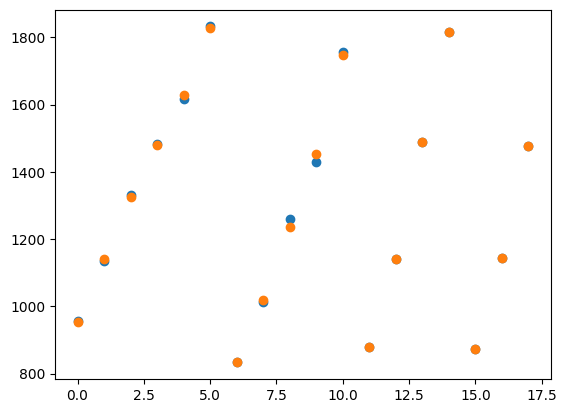

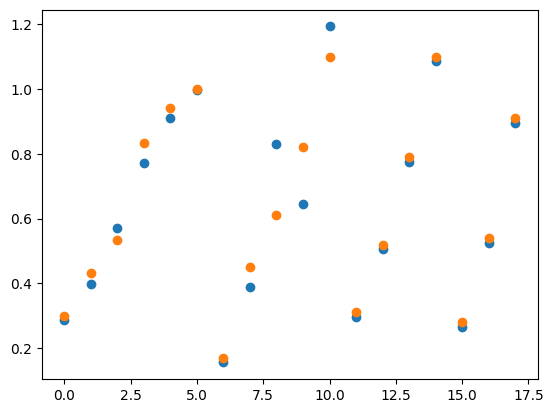

[955.0472799489838, 1135.1764206942778, 1331.3969978510352, 1484.207892142612, 1617.4228760436697, 1832.34341974535, 833.086396238676, 1011.9693286304826, 1259.4683326618615, 1430.5530982825146, 1757.8123352947493, 878.1995854697172, 1140.3948223909074, 1487.2893735397183, 1816.1705618661008, 873.2017637436144, 1142.583665375085, 1477.5446938485252]
[0.2876, 0.397, 0.5713, 0.773, 0.9117000000000001, 0.9981, 0.1563, 0.3899, 0.8291000000000001, 0.6438, 1.1929, 0.29710000000000003, 0.5053, 0.7751, 1.0849, 0.2651, 0.5251, 0.8951]


In [291]:
xpl = list(range(len(V0)))
plt.scatter(xpl,Tm)
plt.scatter(xpl,Tme)
plt.show()

plt.scatter(xpl,tpm)
plt.scatter(xpl,tpe)
plt.show()

print(Tm)
print(list(tpm))
